# OpenCV - Common operations with kernels

## Imports and requirements

Here, we define the required library imports along with the function *url_to_image* which helps us obtain an image from the web into memory

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

We are going to be working with an image of the new font released - __Helvetica Now__

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

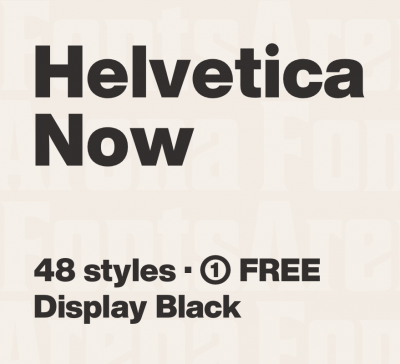

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

## Edge Detection

OpenCV has an existing library to obtain edges which uses the Canny algorithm developed by John.F Canny in 1986. In the following sections, we are going to perform the same edge detection by defining our own kernels and convoling them over the given image.

In [0]:
edges = cv2.Canny(image,100,200)

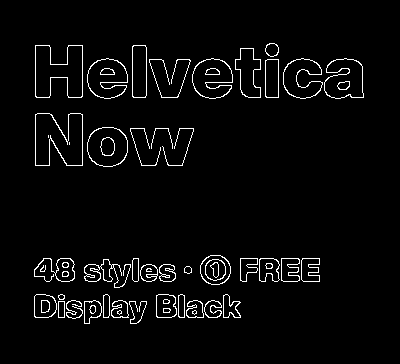

In [0]:
cv2_imshow(edges)

### Vertical edge detector

To our minds, we would think that a 3x3 kernel that adequately represents a vertical edge would be something of the sort of this:

$$\begin{bmatrix}0 & 1 & 0\\0 & 1 & 0 \\ 0 & 1 & 0\end{bmatrix}$$

Let us try this and see what is identified in the image. We use the *filter2D* function from OpenCV to perform convolutions with a given kernel. The middle argument is set to __-1__ when we want the output to have the same dimensions as the input.

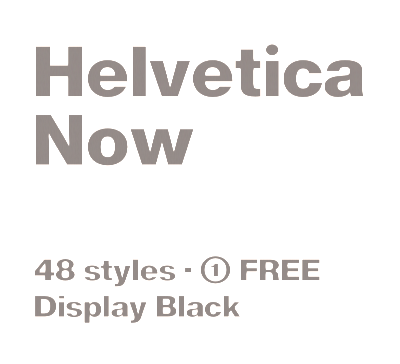

In [6]:
kernel = np.float32([[0,1,0],[0,1,0],[0,1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

What do you think is happening here? 

Interestingly, the edges have been detected, but any region which has text as well is being detected. This is to be expected, as the above kernel gives the same output for an edge OR the center. 

For example, check the operations below.

$$kernel\ . edge = result$$

$$\begin{bmatrix}0 & 1 & 0\\0 & 1 & 0 \\ 0 & 1 & 0\end{bmatrix} . \begin{bmatrix}0 & 1 & 1\\0 & 1 & 1 \\ 0 & 1 & 1\end{bmatrix} = 3$$

$$kernel\ . center = result$$

$$\begin{bmatrix}0 & 1 & 0\\0 & 1 & 0 \\ 0 & 1 & 0\end{bmatrix} . \begin{bmatrix}1 & 1 & 1\\1 & 1 & 1 \\ 1 & 1 & 1\end{bmatrix} = 3$$

To penalize this behaviour, we reform our kernel to the one below:

$$\begin{bmatrix}-1 & 0 & 1\\-1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix}$$

As we can see, this will solve our problem. Going back to our example:

$$kernel\ . edge = result$$

$$\begin{bmatrix}-1 & 0 & 1\\-1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix} . \begin{bmatrix}0 & 1 & 1\\0 & 1 & 1 \\ 0 & 1 & 1\end{bmatrix} = 3$$

$$kernel\ . center = result$$

$$\begin{bmatrix}-1 & 0 & 1\\-1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix} . \begin{bmatrix}1 & 1 & 1\\1 & 1 & 1 \\ 1 & 1 & 1\end{bmatrix} = 0$$

__Note:__ This kernel has been optimized to pick up black edges on a lighter background. To pick up lighter edges, we could replace the center column with 2 instead, as so :

$$\begin{bmatrix}-1 & 2 & 1\\-1 & 2 & 1 \\ -1 & 2 & 1\end{bmatrix}$$

Below are a few trials with this kernel.

One trial is to perform the same filter multiple times to see what happens. This picks up fainter edges as well that are present in the background.

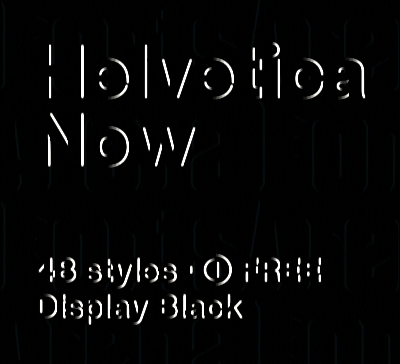

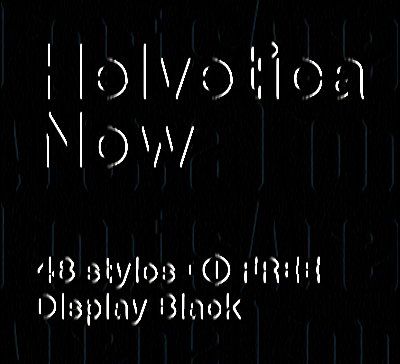

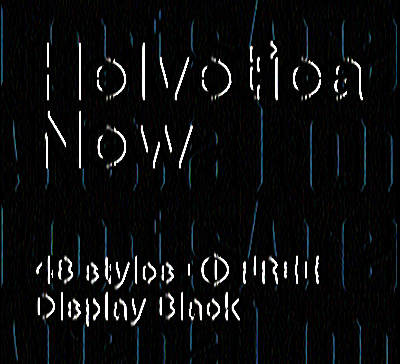

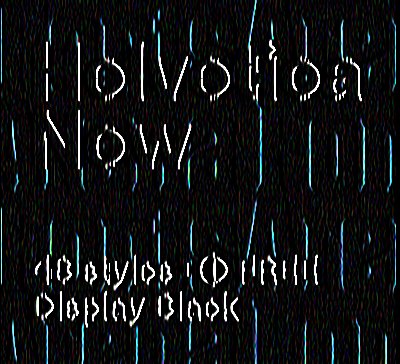

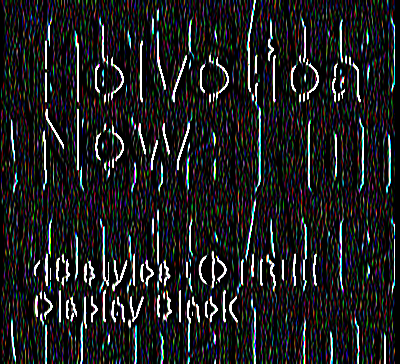

In [0]:
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# running the kernel on the resulted image again
dst2 = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst2)

# and again
dst3 = cv2.filter2D(dst2,-1,kernel)
cv2_imshow(dst3)

# and again
dst4 = cv2.filter2D(dst3,-1,kernel)
cv2_imshow(dst4)

# and again
dst5 = cv2.filter2D(dst4,-1,kernel)
cv2_imshow(dst5)

Tried combining the two possible vertical edge detectors to see what gets picked up. Curious to see that the watermark edges are detected here. This is because the actual vertical edges are returned in white in this case.

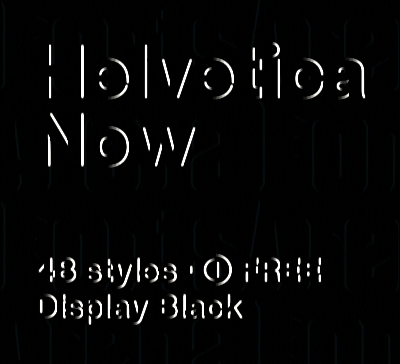

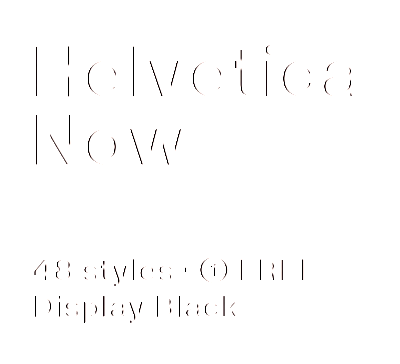

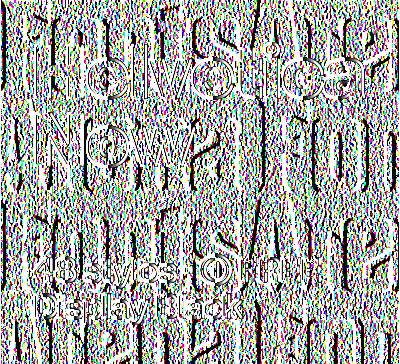

In [0]:
# interesting - lol

kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst_black_to_white = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_black_to_white)

kernel = np.float32([[-1,2,1],[-1,2,1],[-1,2,1]])

dst_white_to_black = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_white_to_black)

dst_all_horizontal = dst_black_to_white + dst_white_to_black
cv2_imshow(dst_all_horizontal)

__Important to Note__

If we observe closely in the above images, not all vertical edges are being detected.
This is because our kernel picks up changes in gradients, and the one below,

$$\begin{bmatrix}-1 & 0 & 1\\-1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix}$$

only picks up gradient changes from black to white.

To obtain the other set of edges, which have a gradient difference from white to black, we use the below kernel:

$$\begin{bmatrix}1 & 0 & -1\\1 & 0 & -1 \\ 1 & 0 & -1\end{bmatrix}$$

Combining both will give us all the edges

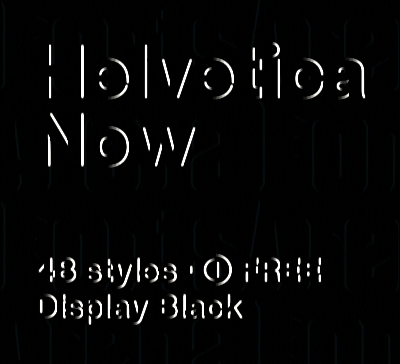

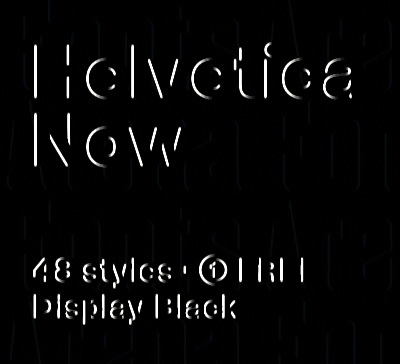

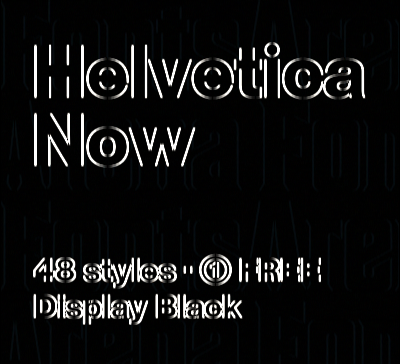

In [0]:
# detect vertical edge

kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst_black_to_white = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_black_to_white)

kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst_white_to_black = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_white_to_black)

dst_all_horizontal = dst_black_to_white + dst_white_to_black
cv2_imshow(dst_all_horizontal)

### Horizontal Edge detection

Here the kernel used is :

$$\begin{bmatrix}-1 & -1 & -1\\0 & 0 & 0 \\ 1 & 1& 1\end{bmatrix}$$

Similar steps have been taken here as above.

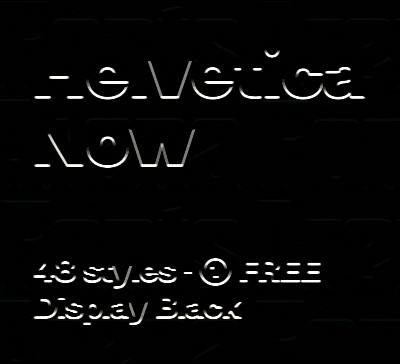

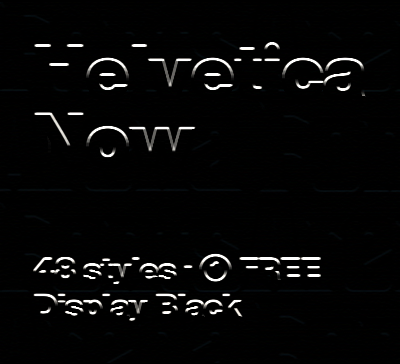

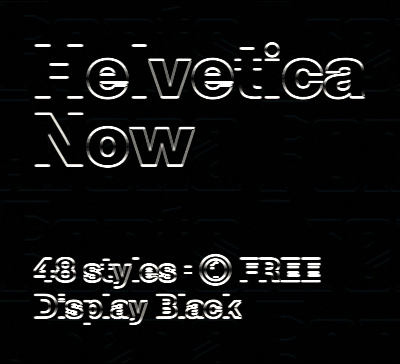

In [0]:
# detect horizontal edge

kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst_black_to_white = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_black_to_white)

kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst_white_to_black = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_white_to_black)

dst_all_horizontal = dst_black_to_white + dst_white_to_black
cv2_imshow(dst_all_horizontal)

### 45 degree angled Edge detection

Here the kernel used is :

$$\begin{bmatrix}0 & -1 & -1\\1 & 0 & -1 \\ 1 & 1& 0\end{bmatrix}$$

Here we capture the gradient across the primaryh diagonal to detected the angled edges.

Similar steps have been taken here as above. 

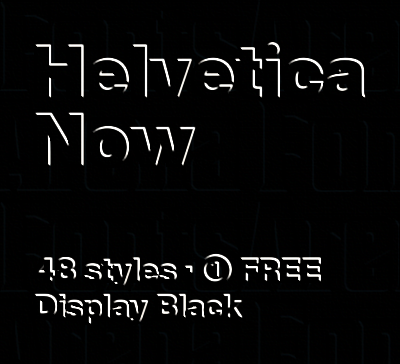

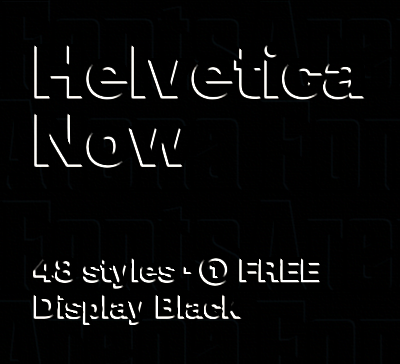

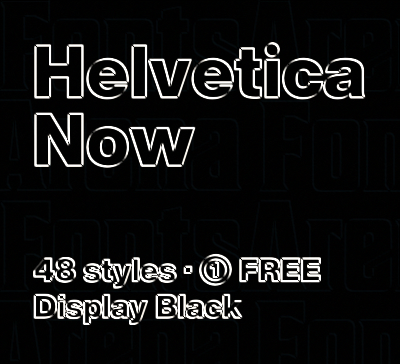

In [0]:
# detect primary diagonal 45 degree edge

kernel = np.float32([[0,1,1],[-1,0,1],[-1,-1,0]])

dst_black_to_white = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_black_to_white)

kernel = np.float32([[0,-1,-1],[1,0,-1],[1,1,0]])

dst_white_to_black = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst_white_to_black)

dst_all_horizontal = dst_black_to_white + dst_white_to_black
cv2_imshow(dst_all_horizontal)

The above is the closest we get to Canny edge detection for this particular image. This is also due to the thick edges in the image which tend to give even straight lines as part of angled detector.

## Other Operations

### Blur

To blur an image, we take the aggregate of all the surrounding pixel values. As a result, the kernel to be use is shown below.

$$\frac{1}{9} \begin{bmatrix}1 & 1 & 1\\1 & 1 & 1 \\ 1 & 1& 1\end{bmatrix}$$

The $\frac{1}{9}$ here is used to maintain scale of the pixel values. We can also use the same kernel multiple times for further blurring.

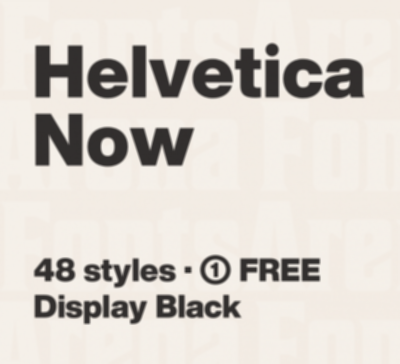

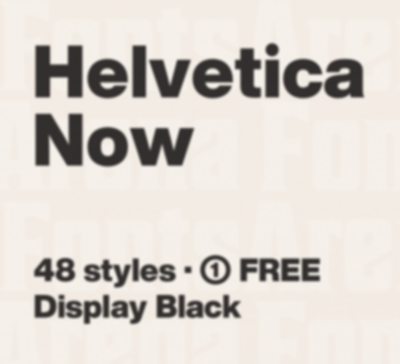

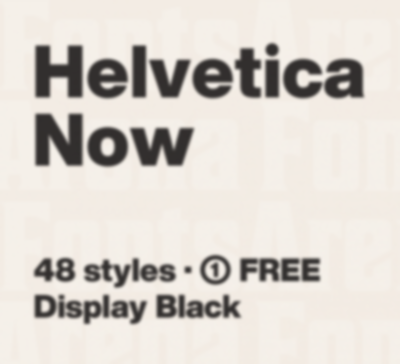

In [0]:
# blur the image

kernel = 1/9.0*np.float32([[1,1,1],[1,1,1],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# more blurring - 5x5 blurring
dst2 = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst2)

# most blurred - acts as 7x7 blurring
dst3 = cv2.filter2D(dst2,-1,kernel)
cv2_imshow(dst3)

### Sharpen

To sharpen an image, we use the inverse logic of blur. We want to increase the contrast of the center pixel value compared to the surrounding pixels. Hence the kernel used is: 

$$\begin{bmatrix}-1 & -1 & -1\\-1 & 9 & -1 \\ -1 & -1& -1\end{bmatrix}$$

The scale is already maintained and this steepens the difference between each pixel and the surrounding pixels.

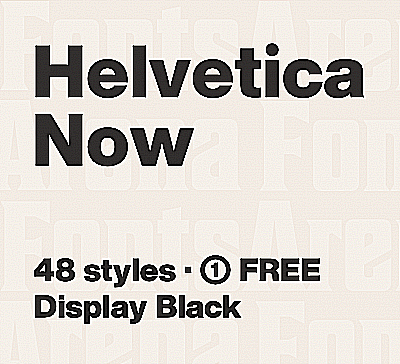

In [0]:
# this should sharpen the image

kernel = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


### Identity

For identity, the logic is fairly simple. The center pixel must retain its existing value. Therefore the following kernel is used:

$$\begin{bmatrix}0 & 0 & 0\\0 & 1 & 0 \\ 0 & 0& 0\end{bmatrix}$$

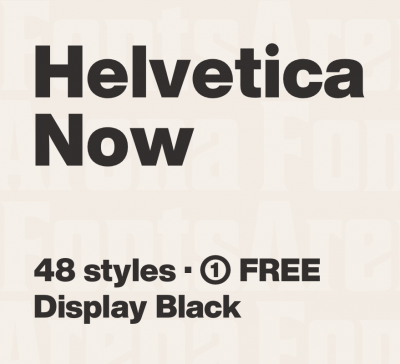

In [0]:
# lets do identity now

kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)